<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Data Science</h1></center>
<center><h2>Voynich</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
    
</blockquote>

* importer <code>pandas</code> et charger le jeu de données
* afficher les 5 premières lignes    

In [4]:
# Insérer le code ici
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
file = open("voynich.txt", "r") 
text = file.read()
file.close()

print(text[:250])

fachys ykal ar ataiin shol shory cthres y kor sholdy sory ckhar or y kair chtaiin shar are cthar cthar dan syaiir sheky or ykaiin shod cthoary cthes daraiin sa ooiin oteey oteos roloty cthar daiin otaiin or okan dair y chear cthaiin cphar cfhaiin yda


In [6]:
vocab = sorted(set(text))
print('{} uniques characters'.format(len(vocab)))

23 uniques characters


In [7]:
## Insérez votre code ici
import numpy as np

char2idx = {j:i for i, j in enumerate(vocab)}
text_as_int = np.array([char2idx[c] for c in text])

print('{')
for char, _ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  ' ' :   0,
  'a' :   1,
  'c' :   2,
  'd' :   3,
  'e' :   4,
  'f' :   5,
  'g' :   6,
  'h' :   7,
  'i' :   8,
  'k' :   9,
  ...
}


In [8]:
import tensorflow as tf

seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

idx2char = np.array(vocab)
for i in char_dataset.take(5):
    print(i, " : ", idx2char[i.numpy()])
    

tf.Tensor(5, shape=(), dtype=int32)  :  f
tf.Tensor(1, shape=(), dtype=int32)  :  a
tf.Tensor(2, shape=(), dtype=int32)  :  c
tf.Tensor(7, shape=(), dtype=int32)  :  h
tf.Tensor(21, shape=(), dtype=int32)  :  y


In [9]:
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

for i in sequences.take(5):
    print(repr(''.join(idx2char[i.numpy()])))

'fachys ykal ar ataiin shol shory cthres y kor sholdy sory ckhar or y kair chtaiin shar are cthar ctha'
'r dan syaiir sheky or ykaiin shod cthoary cthes daraiin sa ooiin oteey oteos roloty cthar daiin otaii'
'n or okan dair y chear cthaiin cphar cfhaiin ydaraishy odar o y shol cphoy oydar sh s cfhoaiin shodar'
'y yshey shody okchoy otchol chocthy oschy dain chor kos daiin shos cfhol shody dain os teody ydain cp'
'hesaiin ol s cphey ytain shoshy cphodales oksho kshoy otairin oteol okan shodain sckhey daiin shoy ck'


In [10]:
## Insérez votre code ici
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

for input_example, target_example in dataset.take(1):
    print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))


Input data:  'fachys ykal ar ataiin shol shory cthres y kor sholdy sory ckhar or y kair chtaiin shar are cthar cth'
Target data: 'achys ykal ar ataiin shol shory cthres y kor sholdy sory ckhar or y kair chtaiin shar are cthar ctha'


In [11]:
dataset = dataset.shuffle(10000).batch(64, drop_remainder = True)

In [12]:
## Insérez votre code ici
from tensorflow.keras.layers import Lambda, RNN, GRU, GRUCell, Dense

vocab_size = len(vocab)

def build_model(batch_size):
    model = tf.keras.Sequential()
    model.add(Lambda(lambda x: tf.one_hot(tf.cast(x, tf.int32), depth=vocab_size), batch_input_shape=[batch_size, None]))
    model.add(RNN(GRUCell(512), 
                  return_sequences=True, 
                  stateful=True))
    model.add(Dense(vocab_size))
    return model


In [13]:
def loss(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

In [72]:
def SaveFitHistory(history, hist_csv_file):
    hist_df = pd.DataFrame(history.history) 
    with open(hist_csv_file+".csv", mode='w') as f:
        hist_df.to_csv(f)
    return hist_df
def PlotFitHistory(hist_csv_file):
    df_hist = pd.read_csv(hist_csv_file+".csv") 
    plt.plot(df_hist['loss'], label=hist_csv_file)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.xlim(0,9)
    #plt.ylim(0,1.4)
    plt.title('Courble de descente de gradient par epoch')
    #plt.legend()
    plt.show()

In [15]:
model = build_model(64)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=loss)

In [16]:
model.fit(dataset, epochs=10)

Epoch 1/10
35/35 [==============================] - 25s 723ms/step - loss: 3.0928
Epoch 2/10
35/35 [==============================] - 26s 737ms/step - loss: 1.5385
Epoch 3/10
35/35 [==============================] - 26s 749ms/step - loss: 1.4717
Epoch 4/10
35/35 [==============================] - 28s 803ms/step - loss: 1.4227
Epoch 5/10
35/35 [==============================] - 27s 786ms/step - loss: 1.3952
Epoch 6/10
35/35 [==============================] - 28s 797ms/step - loss: 1.3747
Epoch 7/10
35/35 [==============================] - 28s 805ms/step - loss: 1.3616
Epoch 8/10
35/35 [==============================] - 28s 791ms/step - loss: 1.3579
Epoch 9/10
35/35 [==============================] - 28s 798ms/step - loss: 1.3556
Epoch 10/10
35/35 [==============================] - 29s 822ms/step - loss: 1.3567


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=loss)
history_training = model.fit(dataset, epochs=10)

Epoch 1/10
35/35 [==============================] - 28s 792ms/step - loss: 1.3386
Epoch 2/10
35/35 [==============================] - 29s 835ms/step - loss: 1.3318
Epoch 3/10
35/35 [==============================] - 27s 758ms/step - loss: 1.3313
Epoch 4/10
35/35 [==============================] - 31s 889ms/step - loss: 1.3282
Epoch 5/10
35/35 [==============================] - 27s 763ms/step - loss: 1.3254
Epoch 6/10
35/35 [==============================] - 29s 818ms/step - loss: 1.3215
Epoch 7/10
35/35 [==============================] - 29s 830ms/step - loss: 1.3200
Epoch 8/10
35/35 [==============================] - 30s 869ms/step - loss: 1.3143
Epoch 9/10
35/35 [==============================] - 30s 850ms/step - loss: 1.3118
Epoch 10/10
35/35 [==============================] - 29s 827ms/step - loss: 1.3084


In [43]:
model.save_weights('model_rnn_epochs10')
df_hist = SaveFitHistory(history_training, 'model_rnn_epochs10')
model = build_model(1)
model.load_weights('model_rnn_epochs10')

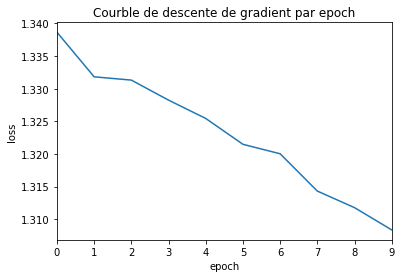

In [48]:
PlotFitHistory('model_rnn_epochs10')

In [49]:
def generate_text(model, start_string, num_generate = 500):
    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    # Reset initial state
    model.reset_states()
    for i in range(num_generate):
        # Probability prediction
        prediction = tf.nn.softmax(model(input_eval), axis=-1)
        # Index prediction
        index = tf.argmax(prediction, axis=-1).numpy()[0]
        input_eval = tf.expand_dims([index[-1]], 0)
        # Save letter in text_generated list
        text_generated.append(idx2char[index[-1]])
    return (start_string + ''.join(text_generated))

In [50]:
print(generate_text(model, start_string="chtaiin "))

chtaiin okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol okeeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol oteeol ote


In [51]:
model = build_model(64)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=loss)
history_training = model.fit(dataset, epochs=100)

model.save_weights('model_rnn_epochs100')
SaveFitHistory(history_training, 'model_rnn_epochs100')


Epoch 1/100
35/35 [==============================] - 26s 745ms/step - loss: 2.8546
Epoch 2/100
35/35 [==============================] - 25s 709ms/step - loss: 2.0968
Epoch 3/100
35/35 [==============================] - 25s 728ms/step - loss: 1.6033
Epoch 4/100
35/35 [==============================] - 26s 737ms/step - loss: 1.4492
Epoch 5/100
35/35 [==============================] - 28s 803ms/step - loss: 1.3910
Epoch 6/100
35/35 [==============================] - 30s 854ms/step - loss: 1.3629
Epoch 7/100
35/35 [==============================] - 30s 854ms/step - loss: 1.3469
Epoch 8/100
35/35 [==============================] - 27s 783ms/step - loss: 1.3337
Epoch 9/100
35/35 [==============================] - 27s 780ms/step - loss: 1.3277
Epoch 10/100
35/35 [==============================] - 33s 931ms/step - loss: 1.3236
Epoch 11/100
35/35 [==============================] - 29s 835ms/step - loss: 1.3171
Epoch 12/100
35/35 [==============================] - 36s 1s/step - loss: 1.3134
Epoc

35/35 [==============================] - 39s 1s/step - loss: 0.6897


,loss
0,2.854640
1,2.096791
2,1.603269
3,1.449210
4,1.391042
...,...
95,0.744066
96,0.730421
97,0.711472
98,0.699348


In [53]:
model = build_model(1)
model.load_weights('model_rnn_epochs100')

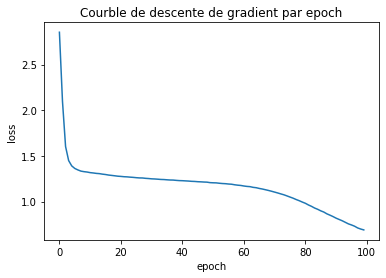

In [68]:
PlotFitHistory('model_rnn_epochs100')

In [69]:
print(generate_text(model, start_string="chtaiin "))

chtaiin otar ar aiin otody qotal sheody qokal okeol okol otoldy otar dar opchey oty daiin sheor okaiin sheody chor shol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol chol cho


In [70]:
model = build_model(64)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=loss)
history_training = model.fit(dataset, epochs=200)

model.save_weights('model_rnn_epochs200')
SaveFitHistory(history_training, 'model_rnn_epochs200')

Epoch 1/200
35/35 [==============================] - 26s 754ms/step - loss: 2.6736
Epoch 2/200
35/35 [==============================] - 25s 712ms/step - loss: 1.8596
Epoch 3/200
35/35 [==============================] - 27s 765ms/step - loss: 1.4901
Epoch 4/200
35/35 [==============================] - 26s 751ms/step - loss: 1.3996
Epoch 5/200
35/35 [==============================] - 27s 761ms/step - loss: 1.3626
Epoch 6/200
35/35 [==============================] - 28s 796ms/step - loss: 1.3438
Epoch 7/200
35/35 [==============================] - 27s 786ms/step - loss: 1.3304
Epoch 8/200
35/35 [==============================] - 30s 855ms/step - loss: 1.3242
Epoch 9/200
35/35 [==============================] - 38s 1s/step - loss: 1.3175
Epoch 10/200
35/35 [==============================] - 33s 936ms/step - loss: 1.3099
Epoch 11/200
35/35 [==============================] - 35s 1s/step - loss: 1.3038
Epoch 12/200
35/35 [==============================] - 32s 920ms/step - loss: 1.2997
Epoch 1

35/35 [==============================] - 43s 1s/step - loss: 0.5667
Epoch 100/200
35/35 [==============================] - 44s 1s/step - loss: 0.5557
Epoch 101/200
35/35 [==============================] - 42s 1s/step - loss: 0.5470
Epoch 102/200
35/35 [==============================] - 42s 1s/step - loss: 0.5396
Epoch 103/200
35/35 [==============================] - 40s 1s/step - loss: 0.5308
Epoch 104/200
35/35 [==============================] - 45s 1s/step - loss: 0.5242
Epoch 105/200
35/35 [==============================] - 48s 1s/step - loss: 0.5173
Epoch 106/200
35/35 [==============================] - 42s 1s/step - loss: 0.5154
Epoch 107/200
35/35 [==============================] - 42s 1s/step - loss: 0.5057
Epoch 108/200
35/35 [==============================] - 45s 1s/step - loss: 0.5017
Epoch 109/200
35/35 [==============================] - 47s 1s/step - loss: 0.4935
Epoch 110/200
35/35 [==============================] - 39s 1s/step - loss: 0.4859
Epoch 111/200
35/35 [=========

35/35 [==============================] - 38s 1s/step - loss: 0.3066
Epoch 198/200
35/35 [==============================] - 34s 978ms/step - loss: 0.3062
Epoch 199/200
35/35 [==============================] - 33s 933ms/step - loss: 0.3051
Epoch 200/200
35/35 [==============================] - 31s 895ms/step - loss: 0.3065


,loss
0,2.673588
1,1.859564
2,1.490112
3,1.399605
4,1.362624
...,...
195,0.306776
196,0.306582
197,0.306206
198,0.305054


In [73]:
model = build_model(1)
model.load_weights('model_rnn_epochs200')

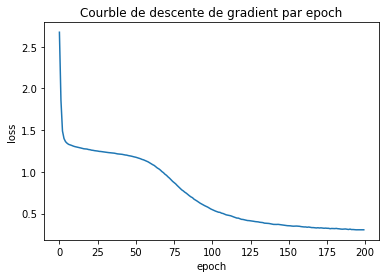

In [74]:
PlotFitHistory('model_rnn_epochs200')

In [75]:
print(generate_text(model, start_string="chtaiin "))

chtaiin octhey cheey qokeey raiin shed qokchey dalkain okaiin chedy qokeeody qokeedy lkeedodaiin qokeey qokeey shey shedy okeey shchey oteody kcheodaiin ol daiin chdar chckhy daiin otam ysheo raiin shey qokeedy qokeey qokain qokeey lchedy lor sheedy qokaiin chedal checkhey checkhy chealy dal char chdy chdy otol otam ychedy qokaiin ol lcheol kcheody qokeey qokeey otchey yteey qoteey aiin okeey lcheey olkar okal keol qotain otar otal ol cheedy qotal sheety otal okaiin am san sheey qotal shedy shey kain sh


In [76]:
model = build_model(64)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=loss)
history_training = model.fit(dataset, epochs=400)

model.save_weights('model_rnn_epochs400')
SaveFitHistory(history_training, 'model_rnn_epochs400')

Epoch 1/400
35/35 [==============================] - 32s 900ms/step - loss: 2.5327
Epoch 2/400
35/35 [==============================] - 32s 909ms/step - loss: 1.7168
Epoch 3/400
35/35 [==============================] - 37s 1s/step - loss: 1.4604
Epoch 4/400
35/35 [==============================] - 37s 1s/step - loss: 1.3851
Epoch 5/400
35/35 [==============================] - 42s 1s/step - loss: 1.3547
Epoch 6/400
35/35 [==============================] - 42s 1s/step - loss: 1.3380
Epoch 7/400
35/35 [==============================] - 36s 1s/step - loss: 1.3297
Epoch 8/400
35/35 [==============================] - 36s 1s/step - loss: 1.3190
Epoch 9/400
35/35 [==============================] - 36s 1s/step - loss: 1.3142
Epoch 10/400
35/35 [==============================] - 35s 1s/step - loss: 1.3073
Epoch 11/400
35/35 [==============================] - 31s 893ms/step - loss: 1.3014
Epoch 12/400
35/35 [==============================] - 31s 875ms/step - loss: 1.2972
Epoch 13/400
35/35 [=====

35/35 [==============================] - 28s 797ms/step - loss: 0.5284
Epoch 100/400
35/35 [==============================] - 28s 811ms/step - loss: 0.5239
Epoch 101/400
35/35 [==============================] - 28s 803ms/step - loss: 0.5162
Epoch 102/400
35/35 [==============================] - 28s 794ms/step - loss: 0.5071
Epoch 103/400
35/35 [==============================] - 28s 787ms/step - loss: 0.4975
Epoch 104/400
35/35 [==============================] - 28s 790ms/step - loss: 0.4951
Epoch 105/400
35/35 [==============================] - 28s 799ms/step - loss: 0.4918
Epoch 106/400
35/35 [==============================] - 28s 797ms/step - loss: 0.4823
Epoch 107/400
35/35 [==============================] - 28s 806ms/step - loss: 0.4738
Epoch 108/400
35/35 [==============================] - 28s 799ms/step - loss: 0.4687
Epoch 109/400
35/35 [==============================] - 28s 810ms/step - loss: 0.4630
Epoch 110/400
35/35 [==============================] - 28s 796ms/step - loss: 0

35/35 [==============================] - 28s 806ms/step - loss: 0.3027
Epoch 196/400
35/35 [==============================] - 29s 823ms/step - loss: 0.2995
Epoch 197/400
35/35 [==============================] - 29s 814ms/step - loss: 0.3019
Epoch 198/400
35/35 [==============================] - 28s 814ms/step - loss: 0.3010
Epoch 199/400
35/35 [==============================] - 29s 822ms/step - loss: 0.3006
Epoch 200/400
35/35 [==============================] - 29s 822ms/step - loss: 0.3002
Epoch 201/400
35/35 [==============================] - 28s 806ms/step - loss: 0.3014
Epoch 202/400
35/35 [==============================] - 29s 815ms/step - loss: 0.2976
Epoch 203/400
35/35 [==============================] - 29s 825ms/step - loss: 0.2967
Epoch 204/400
35/35 [==============================] - 28s 809ms/step - loss: 0.2989
Epoch 205/400
35/35 [==============================] - 28s 811ms/step - loss: 0.2942
Epoch 206/400
35/35 [==============================] - 28s 809ms/step - loss: 0

35/35 [==============================] - 33s 930ms/step - loss: 0.2585
Epoch 292/400
35/35 [==============================] - 31s 888ms/step - loss: 0.2636
Epoch 293/400
35/35 [==============================] - 30s 866ms/step - loss: 0.2633
Epoch 294/400
35/35 [==============================] - 30s 866ms/step - loss: 0.2622
Epoch 295/400
35/35 [==============================] - 31s 884ms/step - loss: 0.2582
Epoch 296/400
35/35 [==============================] - 30s 860ms/step - loss: 0.2553
Epoch 297/400
35/35 [==============================] - 32s 911ms/step - loss: 0.2558
Epoch 298/400
35/35 [==============================] - 31s 898ms/step - loss: 0.2532
Epoch 299/400
35/35 [==============================] - 31s 887ms/step - loss: 0.2585
Epoch 300/400
35/35 [==============================] - 38s 1s/step - loss: 0.2570
Epoch 301/400
35/35 [==============================] - 38s 1s/step - loss: 0.2579
Epoch 302/400
35/35 [==============================] - 35s 1s/step - loss: 0.2536
Epo

35/35 [==============================] - 28s 795ms/step - loss: 0.2412
Epoch 389/400
35/35 [==============================] - 28s 793ms/step - loss: 0.2435
Epoch 390/400
35/35 [==============================] - 28s 804ms/step - loss: 0.2429
Epoch 391/400
35/35 [==============================] - 28s 794ms/step - loss: 0.2478
Epoch 392/400
35/35 [==============================] - 28s 796ms/step - loss: 0.2450
Epoch 393/400
35/35 [==============================] - 28s 796ms/step - loss: 0.2373
Epoch 394/400
35/35 [==============================] - 28s 795ms/step - loss: 0.2353
Epoch 395/400
35/35 [==============================] - 28s 797ms/step - loss: 0.2314
Epoch 396/400
35/35 [==============================] - 28s 804ms/step - loss: 0.2288
Epoch 397/400
35/35 [==============================] - 28s 793ms/step - loss: 0.2275
Epoch 398/400
35/35 [==============================] - 28s 799ms/step - loss: 0.2259
Epoch 399/400
35/35 [==============================] - 28s 795ms/step - loss: 0

,loss
0,2.532703
1,1.716840
2,1.460448
3,1.385148
4,1.354741
...,...
395,0.228823
396,0.227547
397,0.225905
398,0.226660


In [80]:
model = build_model(1)
model.load_weights('model_rnn_epochs400')

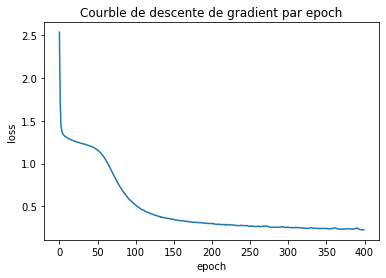

In [78]:
PlotFitHistory('model_rnn_epochs400')

In [79]:
print(generate_text(model, start_string="chtaiin "))

chtaiin ols chedy olaiin ytar oty sho char chekeey ykeey saiin okeos shor sheos sheey teeody cheody okeey cheody qokeechy okcheey qochshy qokaiin sheol qokear cheedy olcheey qokal qokaoy solkeedy qokeedy qokeedy saiin okaiin chedy qotaiin chor cheykedy qokeedy qokeedy qotey qokeey qokeey otedy qotaiin dshedy tedy checkhey sheeky lsheedain shear ol chechos ykeey kodaiin cphol daiin dal dar qokaiin cheol lchey qoky choky chol cthol shol okal dolchey chodo lol chy cthy qo ol choeee cheol dol cthey ykol dol


In [81]:
model = build_model(64)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=loss)
history_training = model.fit(dataset, epochs=1000)

model.save_weights('model_rnn_epochs1000')
SaveFitHistory(history_training, 'model_rnn_epochs1000')

Epoch 1/1000
35/35 [==============================] - 26s 741ms/step - loss: 2.9073
Epoch 2/1000
35/35 [==============================] - 28s 808ms/step - loss: 2.1504
Epoch 3/1000
35/35 [==============================] - 28s 813ms/step - loss: 1.6351
Epoch 4/1000
35/35 [==============================] - 30s 867ms/step - loss: 1.4649
Epoch 5/1000
35/35 [==============================] - 31s 885ms/step - loss: 1.4001
Epoch 6/1000
35/35 [==============================] - 38s 1s/step - loss: 1.3693
Epoch 7/1000
35/35 [==============================] - 43s 1s/step - loss: 1.3504
Epoch 8/1000
35/35 [==============================] - 44s 1s/step - loss: 1.3382
Epoch 9/1000
35/35 [==============================] - 39s 1s/step - loss: 1.3314
Epoch 10/1000
35/35 [==============================] - 36s 1s/step - loss: 1.3239
Epoch 11/1000
35/35 [==============================] - 31s 876ms/step - loss: 1.3180
Epoch 12/1000
35/35 [==============================] - 32s 905ms/step - loss: 1.3149
Epoc

35/35 [==============================] - 30s 867ms/step - loss: 0.7686
Epoch 99/1000
35/35 [==============================] - 30s 867ms/step - loss: 0.7515
Epoch 100/1000
35/35 [==============================] - 31s 876ms/step - loss: 0.7353
Epoch 101/1000
35/35 [==============================] - 30s 870ms/step - loss: 0.7217
Epoch 102/1000
35/35 [==============================] - 31s 885ms/step - loss: 0.7094
Epoch 103/1000
35/35 [==============================] - 31s 884ms/step - loss: 0.6950
Epoch 104/1000
35/35 [==============================] - 31s 880ms/step - loss: 0.6850
Epoch 105/1000
35/35 [==============================] - 31s 893ms/step - loss: 0.6704
Epoch 106/1000
35/35 [==============================] - 30s 868ms/step - loss: 0.6561
Epoch 107/1000
35/35 [==============================] - 31s 877ms/step - loss: 0.6483
Epoch 108/1000
35/35 [==============================] - 31s 877ms/step - loss: 0.6365
Epoch 109/1000
35/35 [==============================] - 30s 864ms/step

35/35 [==============================] - 30s 844ms/step - loss: 0.3209
Epoch 194/1000
35/35 [==============================] - 30s 856ms/step - loss: 0.3195
Epoch 195/1000
35/35 [==============================] - 30s 849ms/step - loss: 0.3186
Epoch 196/1000
35/35 [==============================] - 29s 843ms/step - loss: 0.3156
Epoch 197/1000
35/35 [==============================] - 29s 834ms/step - loss: 0.3177
Epoch 198/1000
35/35 [==============================] - 29s 828ms/step - loss: 0.3152
Epoch 199/1000
35/35 [==============================] - 29s 840ms/step - loss: 0.3162
Epoch 200/1000
35/35 [==============================] - 29s 822ms/step - loss: 0.3116
Epoch 201/1000
35/35 [==============================] - 30s 845ms/step - loss: 0.3119
Epoch 202/1000
35/35 [==============================] - 29s 841ms/step - loss: 0.3096
Epoch 203/1000
35/35 [==============================] - 29s 839ms/step - loss: 0.3090
Epoch 204/1000
35/35 [==============================] - 29s 829ms/ste

35/35 [==============================] - 29s 842ms/step - loss: 0.2680
Epoch 289/1000
35/35 [==============================] - 30s 843ms/step - loss: 0.2656
Epoch 290/1000
35/35 [==============================] - 29s 830ms/step - loss: 0.2645
Epoch 291/1000
35/35 [==============================] - 29s 840ms/step - loss: 0.2614
Epoch 292/1000
35/35 [==============================] - 30s 849ms/step - loss: 0.2619
Epoch 293/1000
35/35 [==============================] - 29s 827ms/step - loss: 0.2599
Epoch 294/1000
35/35 [==============================] - 29s 826ms/step - loss: 0.2588
Epoch 295/1000
35/35 [==============================] - 30s 861ms/step - loss: 0.2611
Epoch 296/1000
35/35 [==============================] - 31s 879ms/step - loss: 0.2600
Epoch 297/1000
35/35 [==============================] - 29s 826ms/step - loss: 0.2608
Epoch 298/1000
35/35 [==============================] - 29s 818ms/step - loss: 0.2627
Epoch 299/1000
35/35 [==============================] - 29s 819ms/ste

35/35 [==============================] - 29s 826ms/step - loss: 0.2443
Epoch 384/1000
35/35 [==============================] - 29s 829ms/step - loss: 0.2431
Epoch 385/1000
35/35 [==============================] - 28s 814ms/step - loss: 0.2469
Epoch 386/1000
35/35 [==============================] - 29s 825ms/step - loss: 0.2433
Epoch 387/1000
35/35 [==============================] - 30s 859ms/step - loss: 0.2432
Epoch 388/1000
35/35 [==============================] - 29s 830ms/step - loss: 0.2418
Epoch 389/1000
35/35 [==============================] - 30s 843ms/step - loss: 0.2384
Epoch 390/1000
35/35 [==============================] - 29s 837ms/step - loss: 0.2338
Epoch 391/1000
35/35 [==============================] - 29s 831ms/step - loss: 0.2355
Epoch 392/1000
35/35 [==============================] - 29s 828ms/step - loss: 0.2368
Epoch 393/1000
35/35 [==============================] - 29s 836ms/step - loss: 0.2362
Epoch 394/1000
35/35 [==============================] - 31s 886ms/ste

35/35 [==============================] - 29s 831ms/step - loss: 0.2232
Epoch 479/1000
35/35 [==============================] - 29s 821ms/step - loss: 0.2216
Epoch 480/1000
35/35 [==============================] - 29s 822ms/step - loss: 0.2176
Epoch 481/1000
35/35 [==============================] - 29s 829ms/step - loss: 0.2183
Epoch 482/1000
35/35 [==============================] - 30s 844ms/step - loss: 0.2192
Epoch 483/1000
35/35 [==============================] - 29s 833ms/step - loss: 0.2194
Epoch 484/1000
35/35 [==============================] - 29s 830ms/step - loss: 0.2166
Epoch 485/1000
35/35 [==============================] - 29s 825ms/step - loss: 0.2162
Epoch 486/1000
35/35 [==============================] - 29s 827ms/step - loss: 0.2178
Epoch 487/1000
35/35 [==============================] - 29s 828ms/step - loss: 0.2137
Epoch 488/1000
35/35 [==============================] - 29s 840ms/step - loss: 0.2175
Epoch 489/1000
35/35 [==============================] - 29s 828ms/ste

35/35 [==============================] - 29s 829ms/step - loss: 0.2074
Epoch 574/1000
35/35 [==============================] - 29s 823ms/step - loss: 0.2082
Epoch 575/1000
35/35 [==============================] - 29s 831ms/step - loss: 0.2118
Epoch 576/1000
35/35 [==============================] - 29s 824ms/step - loss: 0.2104
Epoch 577/1000
35/35 [==============================] - 30s 855ms/step - loss: 0.2112
Epoch 578/1000
35/35 [==============================] - 29s 830ms/step - loss: 0.2124
Epoch 579/1000
35/35 [==============================] - 29s 825ms/step - loss: 0.2158
Epoch 580/1000
35/35 [==============================] - 29s 816ms/step - loss: 0.2158
Epoch 581/1000
35/35 [==============================] - 29s 818ms/step - loss: 0.2145
Epoch 582/1000
35/35 [==============================] - 29s 824ms/step - loss: 0.2149
Epoch 583/1000
35/35 [==============================] - 29s 835ms/step - loss: 0.2203
Epoch 584/1000
35/35 [==============================] - 31s 876ms/ste

35/35 [==============================] - 29s 827ms/step - loss: 0.2049
Epoch 669/1000
35/35 [==============================] - 29s 835ms/step - loss: 0.2061
Epoch 670/1000
35/35 [==============================] - 29s 823ms/step - loss: 0.2034
Epoch 671/1000
35/35 [==============================] - 29s 827ms/step - loss: 0.2041
Epoch 672/1000
35/35 [==============================] - 29s 832ms/step - loss: 0.2006
Epoch 673/1000
35/35 [==============================] - 29s 827ms/step - loss: 0.2023
Epoch 674/1000
35/35 [==============================] - 29s 824ms/step - loss: 0.2039
Epoch 675/1000
35/35 [==============================] - 29s 821ms/step - loss: 0.2009
Epoch 676/1000
35/35 [==============================] - 29s 836ms/step - loss: 0.2006
Epoch 677/1000
35/35 [==============================] - 29s 834ms/step - loss: 0.1997
Epoch 678/1000
35/35 [==============================] - 29s 829ms/step - loss: 0.2019
Epoch 679/1000
35/35 [==============================] - 29s 830ms/ste

35/35 [==============================] - 29s 823ms/step - loss: 0.1967
Epoch 764/1000
35/35 [==============================] - 29s 820ms/step - loss: 0.1906
Epoch 765/1000
35/35 [==============================] - 29s 820ms/step - loss: 0.1910
Epoch 766/1000
35/35 [==============================] - 30s 862ms/step - loss: 0.1874
Epoch 767/1000
35/35 [==============================] - 30s 857ms/step - loss: 0.1862
Epoch 768/1000
35/35 [==============================] - 30s 857ms/step - loss: 0.1849
Epoch 769/1000
35/35 [==============================] - 30s 855ms/step - loss: 0.1831
Epoch 770/1000
35/35 [==============================] - 30s 850ms/step - loss: 0.1845
Epoch 771/1000
35/35 [==============================] - 30s 853ms/step - loss: 0.1838
Epoch 772/1000
35/35 [==============================] - 30s 850ms/step - loss: 0.1814
Epoch 773/1000
35/35 [==============================] - 30s 859ms/step - loss: 0.1826
Epoch 774/1000
35/35 [==============================] - 30s 850ms/ste

35/35 [==============================] - 29s 828ms/step - loss: 0.2007
Epoch 859/1000
35/35 [==============================] - 29s 820ms/step - loss: 0.2017
Epoch 860/1000
35/35 [==============================] - 29s 825ms/step - loss: 0.2020
Epoch 861/1000
35/35 [==============================] - 29s 827ms/step - loss: 0.2054
Epoch 862/1000
35/35 [==============================] - 28s 809ms/step - loss: 0.1981
Epoch 863/1000
35/35 [==============================] - 29s 823ms/step - loss: 0.1971
Epoch 864/1000
35/35 [==============================] - 29s 820ms/step - loss: 0.1969
Epoch 865/1000
35/35 [==============================] - 29s 826ms/step - loss: 0.1958
Epoch 866/1000
35/35 [==============================] - 30s 852ms/step - loss: 0.1913
Epoch 867/1000
35/35 [==============================] - 31s 890ms/step - loss: 0.1919
Epoch 868/1000
35/35 [==============================] - 31s 874ms/step - loss: 0.1878
Epoch 869/1000
35/35 [==============================] - 29s 839ms/ste

35/35 [==============================] - 29s 821ms/step - loss: 0.1743
Epoch 954/1000
35/35 [==============================] - 29s 819ms/step - loss: 0.1747
Epoch 955/1000
35/35 [==============================] - 28s 812ms/step - loss: 0.1755
Epoch 956/1000
35/35 [==============================] - 29s 821ms/step - loss: 0.1747
Epoch 957/1000
35/35 [==============================] - 29s 822ms/step - loss: 0.1763
Epoch 958/1000
35/35 [==============================] - 29s 837ms/step - loss: 0.1772
Epoch 959/1000
35/35 [==============================] - 29s 826ms/step - loss: 0.1794
Epoch 960/1000
35/35 [==============================] - 29s 822ms/step - loss: 0.1775
Epoch 961/1000
35/35 [==============================] - 29s 819ms/step - loss: 0.1796
Epoch 962/1000
35/35 [==============================] - 29s 816ms/step - loss: 0.1785
Epoch 963/1000
35/35 [==============================] - 29s 818ms/step - loss: 0.1788
Epoch 964/1000
35/35 [==============================] - 29s 821ms/ste

,loss
0,2.907268
1,2.150406
2,1.635134
3,1.464864
4,1.400094
...,...
995,0.177570
996,0.177089
997,0.179145
998,0.182904


In [82]:
model = build_model(1)
model.load_weights('model_rnn_epochs1000')

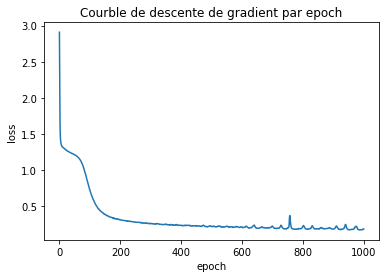

In [83]:
PlotFitHistory('model_rnn_epochs1000')

In [84]:
print(generate_text(model, start_string="chtaiin "))

chtaiin otseey qooeel ckhal chekaiin otaiin chy d r aiin al y sho chekaiin otedo qokeodal saiin otar opaim daiin shl lkeeol lchedy qokor lkaiin chedy qotaiin al ol kaldaim dar alchor kcheo rkeor chol chol cthol chkor sheol olo r okeeol chodaiin okeol tchory ychor cthy cheeky cheo otor oteol dam poraiin otar ar shol tair otaiil okl ol ol chol chl alchedy ykeedy chtal kar opchy famom qokchal qokey qaiin otol teol okal otedar opalchdar chdaiin oldar qoldar chedy daiin otam lshaiir orair shedy chechey dykey
